Recurrent Neural Network (RNN) Tutorial | RNN LSTM Tutorial | Deep Learning Tutorial | Simplilearn

https://www.youtube.com/watch?v=lWkFhVq9-nc

1. Import the Libraries

In [8]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

2. Import the training dataset

In [9]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

3. Feature Scaling

In [10]:
# pip install scikit-learn

In [11]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [12]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
# pip install --upgrade protobuf

In [2]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [3]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.14.0-cp310-cp310-win_amd64.whl (2.1 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.13.0
    Uninstalling tensorflow-2.13.0:
      Successfully uninstalled tensorflow-2.13.0
Note: you may need to restart the kernel to use updated packages.


In [10]:
# pip install keras

In [13]:
# importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

6. Initialize the RNN

In [14]:
# Initializing the RNN
regressor = Sequential()

7. Adding the LSTM layers and some Dropout regularization

In [15]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [16]:
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [18]:
# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [19]:
# Adding the output layer
regressor.add(Dense(units=1))

9. Compile the RNN

In [20]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss='mean_squared_error')

In [21]:
# 10. Fit the RNN to the training set
regressor.fit(X_train, y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 12s 77ms/step - loss: 0.0351
Epoch 2/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0058
Epoch 3/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0052
Epoch 4/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 3s 82ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 3s 85ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 78ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 3s 74ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0043
Epoch 13/100
38/38 [====

11. Load the stock price test data for 2017

In [23]:
# Part 3 - Making the predictions and visualizing the results

# load the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

12. Get the predicted stock price of 2017

In [24]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


13. Visualize the results of predicted and real stock price

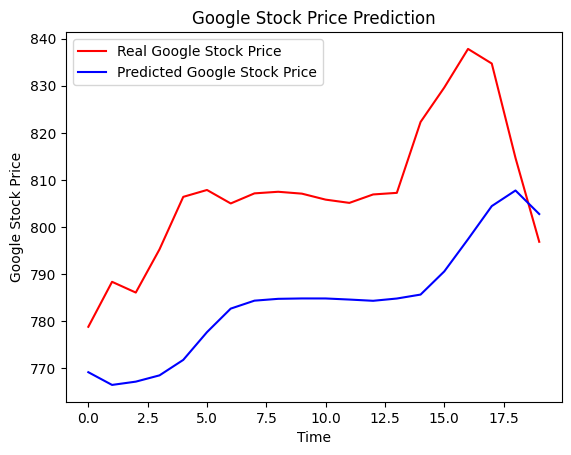

In [26]:
# Visualizing the results
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()